<h1>Build the linear regression model using scikit learn on boston data to predict 'Price'
based on other dependent variable.</h1>

In [1]:
import numpy as np # for numerical claculation using array
import pandas as pd # for dataframe operation
import scipy.stats as stats # modelling using stats model
import matplotlib.pyplot as plt # for visualization
import sklearn  # for modelling 
from sklearn.datasets import load_boston # data import
boston = load_boston()   
bos = pd.DataFrame(boston.data)


In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# no of rows and columns
bos.shape

(506, 13)

In [4]:
#since given dataset doesn't have columns so using command below we get the description about feature's name 
#and target variable
sklearn.datasets.load_boston(return_X_y=False)

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [5]:
sklearn.datasets.load_boston(return_X_y=True)

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

'feature_names': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [6]:
bos.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.rename(columns={0:'CRIM', 1:'ZN',2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD',9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'}, inplace=True)

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
target= np.array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4,
        17. , 15.6, 13.1, 41.3, 24.3, 23.3, 27. , 50. , 50. , 50. , 22.7,
        25. , 50. , 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4,
        23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50. ,
        32. , 29.8, 34.9, 37. , 30.5, 36.4, 31.1, 29.1, 50. , 33.3, 30.3,
        34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50. , 22.6, 24.4, 22.5, 24.4,
        20. , 21.7, 19.3, 22.4, 28.1, 23.7, 25. , 23.3, 28.7, 21.5, 23. ,
        26.7, 21.7, 27.5, 30.1, 44.8, 50. , 37.6, 31.6, 46.7, 31.5, 24.3,
        31.7, 41.7, 48.3, 29. , 24. , 25.1, 31.5, 23.7, 23.3, 22. , 20.1,
        22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6,
        42.8, 21.9, 20.9, 44. , 50. , 36. , 30.1, 33.8, 43.1, 48.8, 31. ,
        36.5, 22.8, 30.7, 50. , 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4,
        32. , 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46. , 50. , 32.2, 22. ,
        20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1,
        20.3, 22.5, 29. , 24.8, 22. , 26.4, 33.1, 36.1, 28.4, 33.4, 28.2,
        22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1,
        21. , 23.8, 23.1, 20.4, 18.5, 25. , 24.6, 23. , 22.2, 19.3, 22.6,
        19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19. , 18.7,
        32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1,
        18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25. , 19.9, 20.8,
        16.8, 21.9, 27.5, 21.9, 23.1, 50. , 50. , 50. , 50. , 50. , 13.8,
        13.8, 15. , 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3,  8.8,
         7.2, 10.5,  7.4, 10.2, 11.5, 15.1, 23.2,  9.7, 13.8, 12.7, 13.1,
        12.5,  8.5,  5. ,  6.3,  5.6,  7.2, 12.1,  8.3,  8.5,  5. , 11.9,
        27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5, 10.4,
         8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9, 11. ,
         9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4, 12.8,
        10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. , 13.4,
        15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4, 17.7,
        19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6, 23.2,
        29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
        20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
        23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [10]:
target.shape

(506,)

In [11]:
#check missing values in the feature set
total_missing=bos.isnull().sum()

In [12]:
total_missing

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
target= pd.DataFrame(target, columns=['Target'])

In [14]:
#check missing values in Target
target.isnull().sum()

Target    0
dtype: int64

<h3> Number of Instances: 506 </h3>
<h3>Number of Attributes: 13  </h3>
<body>                                                             </body>
<body>Attribute Information (in order):\n       
CRIM   -  per capita crime rate by town\n        
ZN     -  proportion of residential land zoned for lots over 25,000 sq.ft.      
INDUS  -  proportion of non-retail business acres per town\n        
CHAS   -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        
NOX    -  nitric oxides concentration (parts per 10 million)\n        
RM     -  average number of rooms per dwelling\n        
AGE    -  proportion of owner-occupied units built prior to 1940\n        
DIS    -  weighted distances to five Boston employment centres\n        
RAD    -  index of accessibility to radial highways\n        
TAX    -  full-value property-tax rate per usd 10,000       
PTRATIO-  pupil-teacher ratio by town      
B      -  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n        
LSTAT  -  lower status of the population       
MEDV   -  Median value of owner-occupied homes in $1000'</body>

<h2>Plots and visalization</h2>

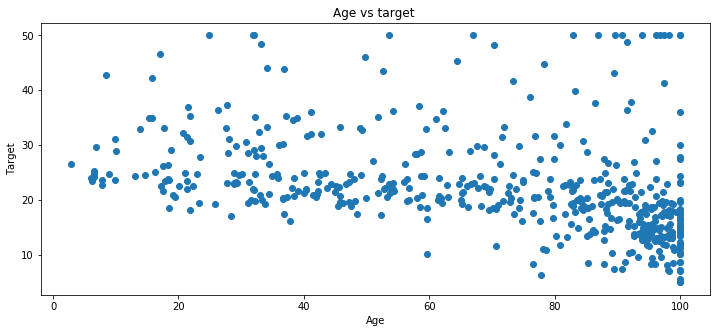

In [15]:
plt.figure(figsize=(12,5))
plt.scatter(bos['AGE'],target['Target'])
plt.xlabel("Age")
plt.ylabel("Target")
plt.title("Age vs target ")
plt.show()

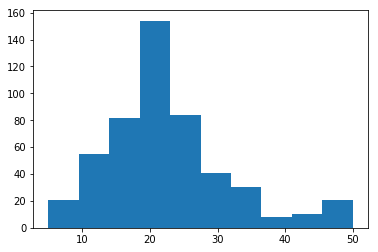

In [16]:
#Histogram of the target variable
plt.hist(target['Target'])
plt.title("")
plt.show()

In [17]:
#Enlisting columns of the dataframe
cols=list(bos.columns)
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

<h3>Scatter plots of all the features vs Target </h3>

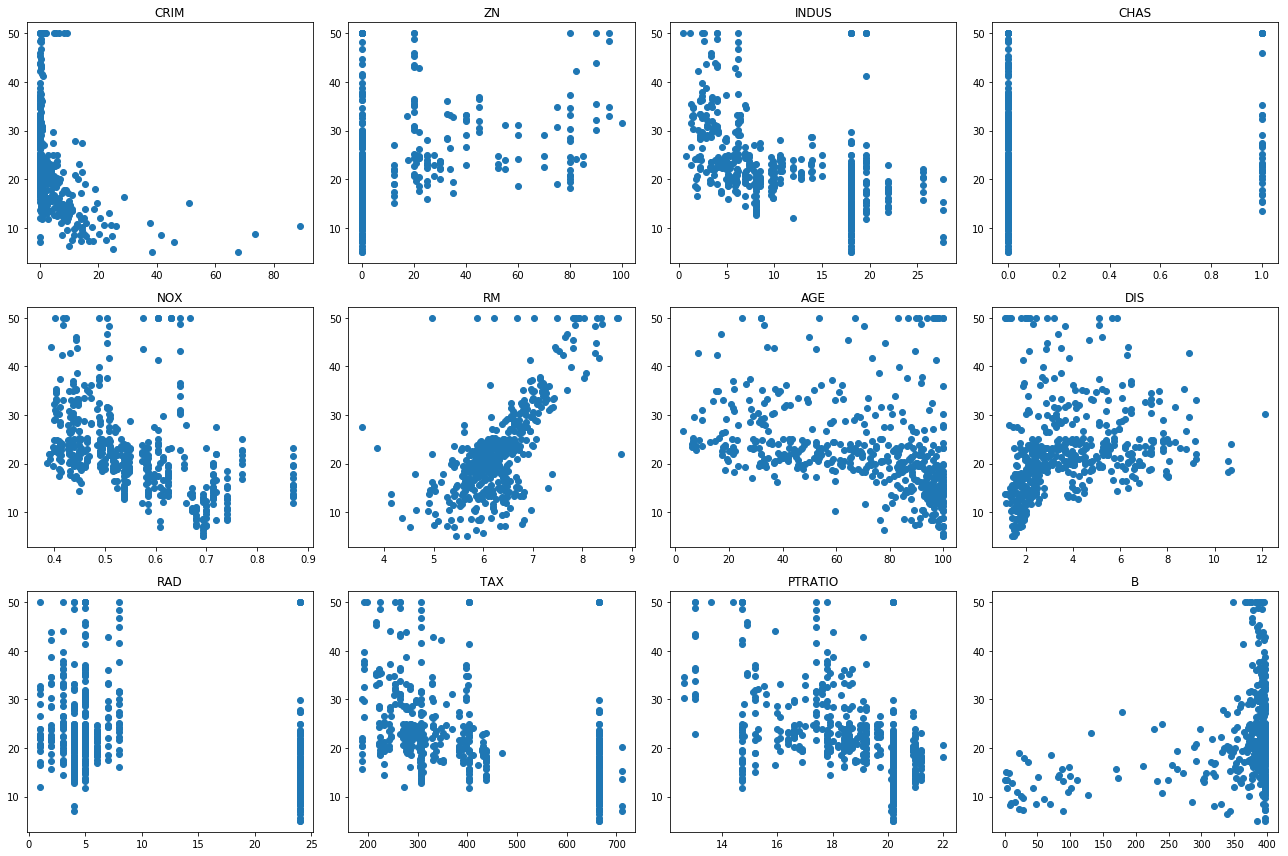

In [18]:
#  creating scatter plots between target variable and each of the features in one go.
fig,axes= plt.subplots(3,4, figsize=(18,12)) # size of the plot and no of plot in one row
for i,ax in enumerate(axes.flat):
    if i<13:
        ax.scatter(bos[cols[i]],target['Target'])
        ax.set_title(cols[i])
plt.tight_layout()

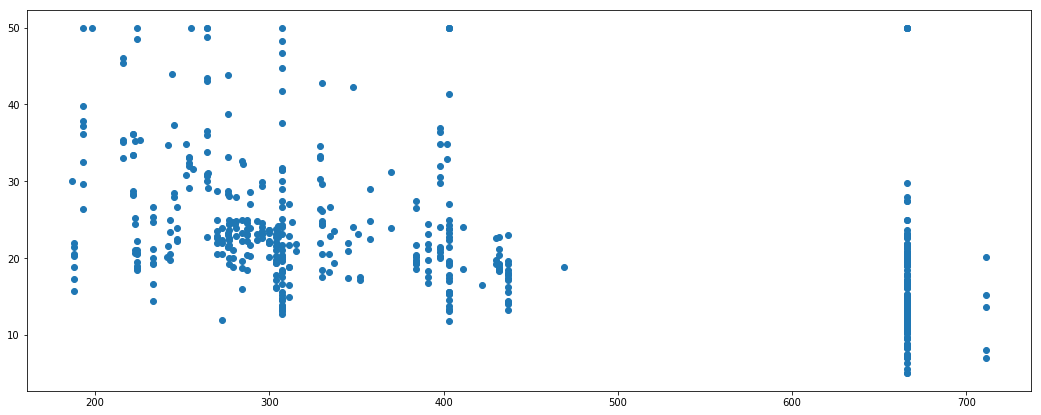

In [19]:
#scatter plot between TAX and Target 
plt.figure(figsize=(18,7)) # for size of the plot ,
plt.scatter(bos['TAX'],target['Target']) 
plt.show()

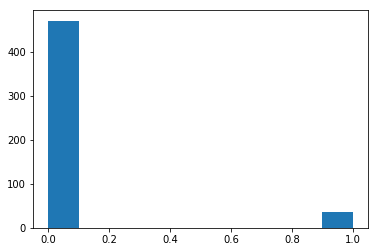

In [20]:
#plt.figure(figsize=(18,7))
plt.hist(bos['CHAS'])
plt.show()

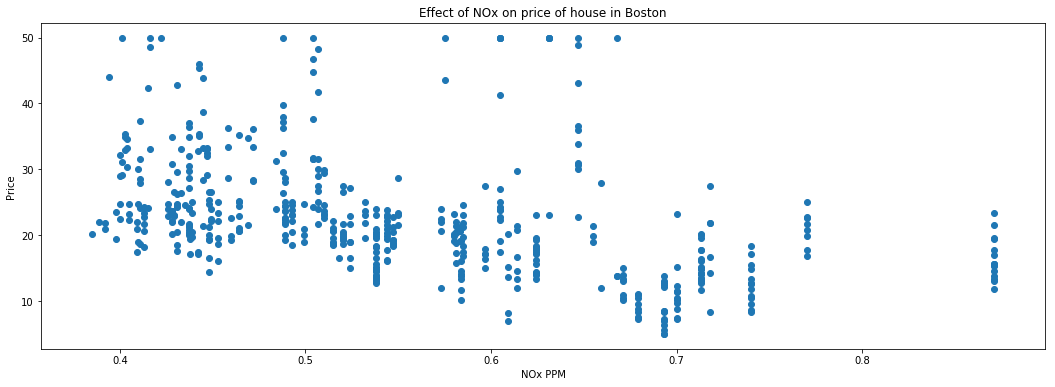

In [21]:
#what is the effect of nitrogrn oxide in the price prediction
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,6))

plt.scatter(x=bos['NOX'],y=target['Target'])
plt.xlabel('NOx PPM')
plt.ylabel('Price ')
plt.title("Effect of NOx on price of house in Boston") # to title the plot
plt.show()


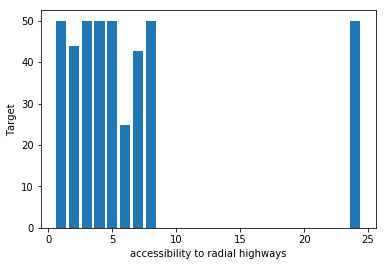

In [22]:
# to plot bar plots between target and radial highways
plt.bar(bos['RAD'],target['Target'])
plt.xlabel("accessibility to radial highways")
plt.ylabel("Target")
plt.show()

In [23]:
bos['RAD'].value_counts() # counting class in variable Radial highways

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

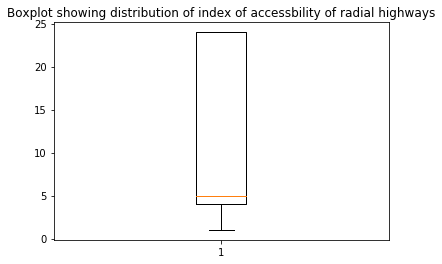

In [24]:
#creating boxplot to see the distribution median and outliers
plt.boxplot(bos['RAD'])
plt.title("Boxplot showing distribution of index of accessbility of radial highways")
plt.show()

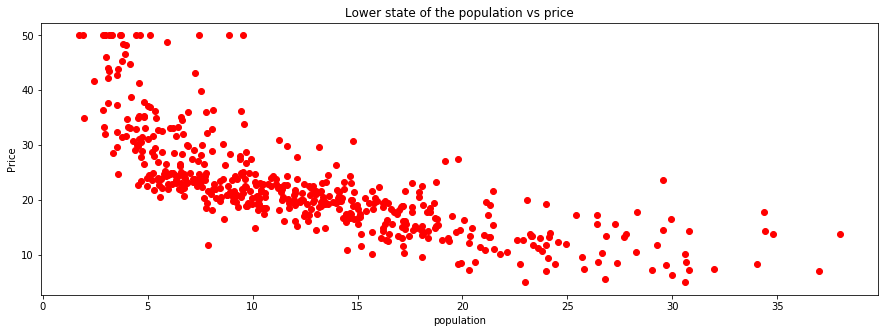

In [25]:
# plot of lower state of the population vs price
plt.figure(figsize=(15,5))
plt.scatter(bos['LSTAT'],target['Target'],color='red')
plt.title("Lower state of the population vs price")
plt.xlabel("population")
plt.ylabel("Price")
plt.show()

In [26]:
import pylab  #Plotting
import scipy.stats as stats # scintific calculation


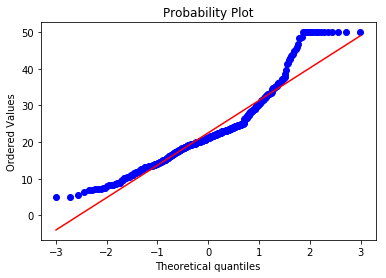

In [27]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(target['Target'], dist="norm", plot=pylab)
pylab.show()

In [28]:
target.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
#<h1>using stat learn model</h1>

In [30]:
#Linear modelling using statmodel
#bos= pd.concat([bos, target],axis=1) # concatenating Target variable in the feature dataframe
#import statsmodels.formula.api as smf
#lm1=smf.ols(formula='Target~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=bos).fit()
#lm1.conf_int()



In [31]:
#lm1.summary()

In [32]:
#since P value for indus and Age is greater than 0.05 so we drop these two  feature from the model and see if it improves or not
#lm2=smf.ols(formula='Target~CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=bos).fit()



In [33]:
#lm2.summary()
#lm2.params is same as coefficient in lm2.summary 

In [34]:
#calculating p values
#lm2.pvalues

<h1>Using SKlearn library for train and test set</h1>

<h3>Linear modelling using SKlearn</h3>

In [35]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
y=target
X=bos

In [37]:
bos.head() # after removing target from the dataframe top 5 rows of the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used instead of sklearn.cross_validation to avoid 
#warning 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(404, 13)

In [40]:
X_test.shape

(102, 13)

In [41]:
y_train.shape

(404, 1)

In [42]:
y_test.shape

(102, 1)

#### Linear regression

In [43]:
from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression()

In [44]:
linear_reg.fit(X_train,y_train) #fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#predict using X_test 
predicted= linear_reg.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error # import mse from sklearn
#claculate root mean squarred error
np.sqrt(mean_squared_error(y_test, predicted))

5.783658787280801

In [47]:
from sklearn import metrics # import metrics from sklearn

Rsquared=linear_reg.score(X_train,y_train) # to determine r square Goodness of fit

In [61]:
# how good the model fits the training data can be determined by R squared metric which is here 0.77
Rsquared

0.7729718726571158

### K fold cross validation

In [49]:
# cross validation score
cv_score= cross_val_score(LinearRegression(),X,y,scoring='neg_mean_squared_error', cv=10) # k =10 

In [50]:
cv_score

array([  -9.30130569,  -14.17208374,  -14.10631149,  -35.19479431,
        -31.92474931,  -19.85853694,   -9.95792   , -168.53075207,
        -33.61791833,  -10.96654317])

In [51]:
# mean squared error
cv_score.mean()

-34.76309150542322

In [52]:
# Root mean squared error
np.sqrt(cv_score.mean() * -1) 

5.896023363710766

####  Removing two features from features with least correlation with target variable

In [53]:
Indus=X.pop('INDUS')
AGE=X.pop('AGE')
#both of the columns have negligable correlations with target so removing from features set

In [54]:
# X_mod is new feature set
X_mod=X 

In [55]:
# train test split
Xmod_train, Xmod_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=0)

In [56]:
#instantiated linear model
lm_mod=LinearRegression()

In [57]:
# fitting the model with training data
lm_mod.fit(Xmod_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#predicting on test data
predict_mod=lm_mod.predict(Xmod_test)

In [59]:
predictor=lm_mod.predict(X_mod)

#### Metric- RMSE

In [60]:
np.sqrt(mean_squared_error(y_test, predict_mod)) #after removing two columns from the fature set there is very small 
#decrease in the RMSE

5.781668166891607

### with Linear regressor we are able to predict the model with 5.8 RMSE and r squared 0.78